In [82]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [83]:
df_ventes_1980_2016 = pd.read_excel("VideoGame_Sales_1980-2016+(1)_kmeans.xlsx")
df_ventes_console_2022 = pd.read_excel("Vente+de+console_2022_kmeans.xlsx")
df_all_2022 = pd.read_excel("All_publish_VideoGame_2022_kmeans.xlsx")

In [84]:
df_ventes_1980_2016.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Constructeur', 'Portable ', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')

In [85]:
# remplacer les oui de la colonne Portable par 1 et les non par 0
df_ventes_1980_2016['Portable'] = df_ventes_1980_2016['Portable '].map({'Oui': 1, 'Non': 0})

In [86]:
df_ventes_1980_2016_colonne = df_ventes_1980_2016[['Name', 'Constructeur', 'Portable', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [87]:
df_all_2022['genres'] = df_all_2022['genres'].str.replace('||', ',')
df_all_2022['platforms'] = df_all_2022['platforms'].str.replace('||', ',')

In [88]:
df_all_2022_colonne = df_all_2022[['name','Annee','rating', 'rating_top', 'playtime','ratings_count', 'genres', 'platforms', 'PC', 'macOS', 'iOS', 'Web', 'Linux', 'Xbox One',
       'Android', 'PS Vita', 'PlayStation 4', 'Nintendo Switch',
       'PlayStation 2', 'Wii U', 'PlayStation 3', 'Xbox 36', 'GameCube', 'Wii',
       'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS', 'PlayStation', 'PSP',
       'Nintendo DS', 'Game Boy Advance', 'Game Boy Color', 'Game Boy',
       'Nintendo DSi', 'SNES', 'SEGA Master System', 'Nintendo 64',
       'Classic Macintosh', 'Apple II', 'NES', 'Dreamcast', 'PlayStation 5',
       'Xbox Series S/X', 'Commodore / Amiga', 'Atari 26', 'Atari ST',
       'Atari 78', 'SEGA Saturn']]
df_all_2022_colonne

,name,Annee,rating,rating_top,playtime,ratings_count,genres,platforms,PC,macOS,...,Apple II,NES,Dreamcast,PlayStation 5,Xbox Series S/X,Commodore / Amiga,Atari 26,Atari ST,Atari 78,SEGA Saturn
0,D/Generation HD,2015,0.0,0.0,1.0,2.0,"Adventure,Puzzle","PC,macOS,Xbox One,PlayStation 4,Nintendo Switch",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G Prime Into The Rain,2016,0.0,0.0,0.0,3.0,"Simulation,Indie","macOS,PC,Xbox One",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Land Sliders,2015,0.0,0.0,0.0,2.0,"Adventure,Arcade",iOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pixel Gear,2016,0.0,0.0,0.0,0.0,"Action,Indie","PC,PlayStation 4",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gods and Idols,2016,0.0,1.0,1.0,5.0,"RPG,Strategy,Massively Multiplayer",PC,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440891,Holy or Dead,2017,0.0,0.0,0.0,0.0,NaN,PC,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440892,Airstrike HD Demo,2016,0.0,0.0,0.0,0.0,Action,PC,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440893,Urania's Mirror,2016,0.0,0.0,0.0,0.0,Adventure,PC,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440894,Simucities,2017,0.0,0.0,0.0,0.0,NaN,PC,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# supprimer lignes nulles de 'genres' et 'platforms'
df_all_2022_clean_na = df_all_2022_colonne.dropna(subset=['genres', 'platforms'])

In [90]:
# Pour éviter les problèmes de casse ou d'espaces, on peut normaliser les noms avant la jointure
df_all_2022_clean_na['name_clean'] = df_all_2022_clean_na['name'].str.strip().str.lower()
df_ventes_1980_2016_colonne['Name_clean'] = df_ventes_1980_2016_colonne['Name'].str.strip().str.lower()

C:\Users\simon\AppData\Local\Temp\ipykernel_19580\4177237927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_2022_clean_na['name_clean'] = df_all_2022_clean_na['name'].str.strip().str.lower()
C:\Users\simon\AppData\Local\Temp\ipykernel_19580\4177237927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventes_1980_2016_colonne['Name_clean'] = df_ventes_1980_2016_colonne['Name'].str.strip().str.lower()


In [91]:
# Faire la jointure
df_final = df_ventes_1980_2016_colonne.merge(df_all_2022_clean_na, left_on='Name_clean', right_on='name_clean', how='left')


In [92]:
df_final

,Name,Constructeur,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_clean,name,...,NES,Dreamcast,PlayStation 5,Xbox Series S/X,Commodore / Amiga,Atari 26,Atari ST,Atari 78,SEGA Saturn,name_clean
0,Wii Sports,Nintendo,0.0,41.4900,27.8592,3.6569,8.2908,81.2969,wii sports,Wii Sports,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wii sports
1,Super Mario Bros.,Nintendo,0.0,29.9524,3.4726,6.6738,0.8085,40.9073,super mario bros.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Nintendo,0.0,15.2160,12.4936,3.7900,3.3762,34.8758,mario kart wii,Mario Kart Wii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mario kart wii
3,Wii Sports Resort,Nintendo,0.0,15.7500,11.0100,3.1816,3.0784,33.0200,wii sports resort,Wii Sports Resort,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wii sports resort
4,Pokemon Red/Pokemon Blue,Nintendo,1.0,11.2700,9.0678,9.8112,0.9900,31.1390,pokemon red/pokemon blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,15 Days,PC,0.0,0.0000,0.0096,0.0000,0.0000,0.0096,15 days,15 Days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 days
16725,The Treasures of Mystery Island 3 Pack - Save ...,PC,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,the treasures of mystery island 3 pack - save ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16726,Carmageddon 64,Nintendo,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,carmageddon 64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16727,Secret Files 2: Puritas Cordis,Nintendo,1.0,0.0000,0.0096,0.0000,0.0000,0.0096,secret files 2: puritas cordis,Secret Files 2: Puritas Cordis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,secret files 2: puritas cordis


In [93]:
# rempalcer tous les NA du tableaux par 0
df_final.fillna(0, inplace=True)
df_final

,Name,Constructeur,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_clean,name,...,NES,Dreamcast,PlayStation 5,Xbox Series S/X,Commodore / Amiga,Atari 26,Atari ST,Atari 78,SEGA Saturn,name_clean
0,Wii Sports,Nintendo,0.0,41.4900,27.8592,3.6569,8.2908,81.2969,wii sports,Wii Sports,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wii sports
1,Super Mario Bros.,Nintendo,0.0,29.9524,3.4726,6.6738,0.8085,40.9073,super mario bros.,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Mario Kart Wii,Nintendo,0.0,15.2160,12.4936,3.7900,3.3762,34.8758,mario kart wii,Mario Kart Wii,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mario kart wii
3,Wii Sports Resort,Nintendo,0.0,15.7500,11.0100,3.1816,3.0784,33.0200,wii sports resort,Wii Sports Resort,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wii sports resort
4,Pokemon Red/Pokemon Blue,Nintendo,1.0,11.2700,9.0678,9.8112,0.9900,31.1390,pokemon red/pokemon blue,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,15 Days,PC,0.0,0.0000,0.0096,0.0000,0.0000,0.0096,15 days,15 Days,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15 days
16725,The Treasures of Mystery Island 3 Pack - Save ...,PC,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,the treasures of mystery island 3 pack - save ...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16726,Carmageddon 64,Nintendo,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,carmageddon 64,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16727,Secret Files 2: Puritas Cordis,Nintendo,1.0,0.0000,0.0096,0.0000,0.0000,0.0096,secret files 2: puritas cordis,Secret Files 2: Puritas Cordis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,secret files 2: puritas cordis


# K Means

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [95]:
# création du X pour garder uniquement les valeurs numériques
X = df_final.select_dtypes(include=['number'])

In [96]:
# Standardisation (objectif = avoir la même échelle pour toutes les données)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
modelKM = KMeans(n_clusters=3, random_state=3)
modelKM.fit(X_scaled)

c:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=3)

In [98]:
# Afficher le centre des clusters
KMcc = modelKM.cluster_centers_
KMcc

array([[ 2.15260960e-01,  1.00023758e-01, -1.96251891e-02,
        -1.97739719e-01, -3.62336985e-02,  3.38112293e-03,
         1.09100243e+00,  6.79584612e-01,  6.91677188e-01,
         4.08982995e-02, -4.80593892e-02,  7.96539214e-01,
        -1.47693647e-01, -4.08241868e-02, -6.80005087e-02,
        -6.41040193e-02, -1.84335712e-01,  1.45425461e-02,
        -1.39841808e-01, -2.07918698e-01, -1.19620654e-01,
         1.62747425e+00,  1.74862484e-01, -1.23967603e-01,
         5.10807602e-02,  2.22105140e+00,  3.35983510e-01,
         8.87731876e-01, -1.33925902e-02, -1.54648935e-02,
        -8.67950740e-02,  1.01981191e+00,  1.58508612e-01,
         7.27415497e-01,  4.35971290e+00,  1.32589909e+00,
         4.47435547e+00,  1.33168340e-01, -1.09346773e-02,
         0.00000000e+00,  6.14338012e-01,  1.67165360e+00,
         0.00000000e+00, -1.72907934e-02,  5.17899987e-01,
        -1.72907934e-02, -1.72907934e-02,  1.60466558e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [99]:
clusters = modelKM.labels_
clusters

array([2, 2, 2, ..., 1, 2, 1])

In [100]:
# prédiction des clusters pour chaque ligne
clusters = modelKM.labels_
# Ajouter les clusters au DataFrame original
df_final['cluster'] = clusters

In [101]:
df_final

,Name,Constructeur,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_clean,name,...,Dreamcast,PlayStation 5,Xbox Series S/X,Commodore / Amiga,Atari 26,Atari ST,Atari 78,SEGA Saturn,name_clean,cluster
0,Wii Sports,Nintendo,0.0,41.4900,27.8592,3.6569,8.2908,81.2969,wii sports,Wii Sports,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wii sports,2
1,Super Mario Bros.,Nintendo,0.0,29.9524,3.4726,6.6738,0.8085,40.9073,super mario bros.,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
2,Mario Kart Wii,Nintendo,0.0,15.2160,12.4936,3.7900,3.3762,34.8758,mario kart wii,Mario Kart Wii,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mario kart wii,2
3,Wii Sports Resort,Nintendo,0.0,15.7500,11.0100,3.1816,3.0784,33.0200,wii sports resort,Wii Sports Resort,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wii sports resort,2
4,Pokemon Red/Pokemon Blue,Nintendo,1.0,11.2700,9.0678,9.8112,0.9900,31.1390,pokemon red/pokemon blue,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,15 Days,PC,0.0,0.0000,0.0096,0.0000,0.0000,0.0096,15 days,15 Days,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15 days,1
16725,The Treasures of Mystery Island 3 Pack - Save ...,PC,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,the treasures of mystery island 3 pack - save ...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
16726,Carmageddon 64,Nintendo,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,carmageddon 64,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
16727,Secret Files 2: Puritas Cordis,Nintendo,1.0,0.0000,0.0096,0.0000,0.0000,0.0096,secret files 2: puritas cordis,Secret Files 2: Puritas Cordis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,secret files 2: puritas cordis,2


In [102]:
df_final.describe()

,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Annee,rating,rating_top,playtime,...,NES,Dreamcast,PlayStation 5,Xbox Series S/X,Commodore / Amiga,Atari 26,Atari ST,Atari 78,SEGA Saturn,cluster
count,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,...,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.0,16729.0,16729.0,16729.0,16729.000000
mean,0.311256,0.273819,0.150526,0.079784,0.048903,0.553032,912.366669,0.917092,1.012254,1.788631,...,0.000299,0.003945,0.000299,0.000299,0.000060,0.0,0.0,0.0,0.0,1.182318
std,0.463021,0.859406,0.569287,0.310061,0.215596,1.675648,1000.095640,1.606124,1.740185,9.588062,...,0.017286,0.062689,0.017286,0.017286,0.007732,0.0,0.0,0.0,0.0,0.490947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.060700,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
50%,0.000000,0.080800,0.021000,0.000000,0.010100,0.176800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
75%,1.000000,0.252000,0.117600,0.040000,0.031500,0.500300,2008.000000,2.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,41.490000,27.859200,9.811200,12.098600,81.296900,2020.000000,4.760000,5.000000,239.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,2.000000


In [103]:
# Suppression des lignes où l'année est 0
df_final = df_final[df_final['Annee'] != 0]

# Visualisation centre des clusters

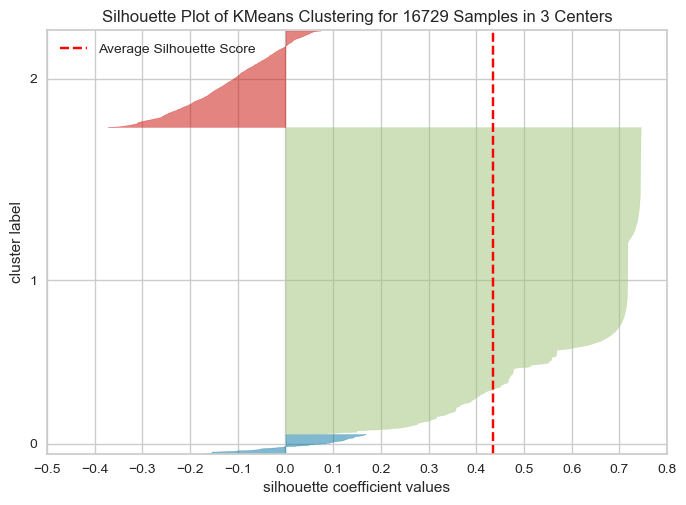

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 16729 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [104]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(modelKM, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()


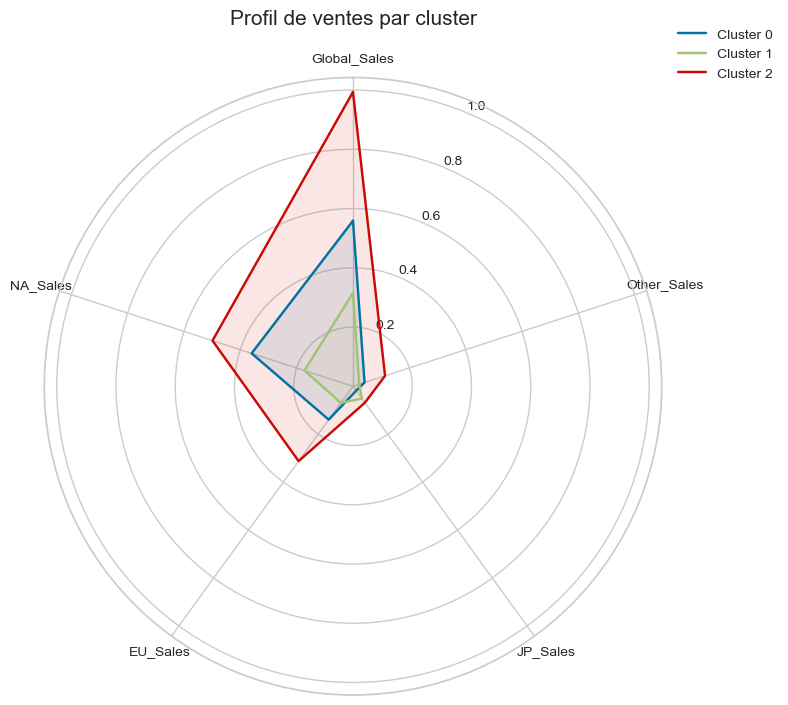

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Colonnes à visualiser
cols = ['Global_Sales', 'Other_Sales', 'JP_Sales', 'EU_Sales', 'NA_Sales']

# Moyenne des ventes par cluster
cluster_means = df_final.groupby('cluster')[cols].mean()

# Normalisation (optionnelle, utile si les échelles sont trop différentes)
# cluster_means = cluster_means.div(cluster_means.max(axis=1), axis=0)

# Préparation pour le radar chart
labels = cols
num_vars = len(labels)

# Calcul des angles pour chaque axe
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Boucler pour fermer le cercle
angles += angles[:1]

# Initialisation du radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracer chaque cluster
for i, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]  # Boucle pour fermer le polygone
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

# Réglages de l'axe
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Légende et titre
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Profil de ventes par cluster', size=15, pad=20)
plt.tight_layout()
plt.show()


C:\Users\simon\AppData\Local\Temp\ipykernel_19580\2461946192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[genre] = df_final['genres'].str.contains(genre, case=False, na=False).astype(int)
C:\Users\simon\AppData\Local\Temp\ipykernel_19580\2461946192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[genre] = df_final['genres'].str.contains(genre, case=False, na=False).astype(int)
C:\Users\simon\AppData\Local\Temp\ipykernel_19580\2461946192.py:8: SettingWithCopyWarning: 
A value is t

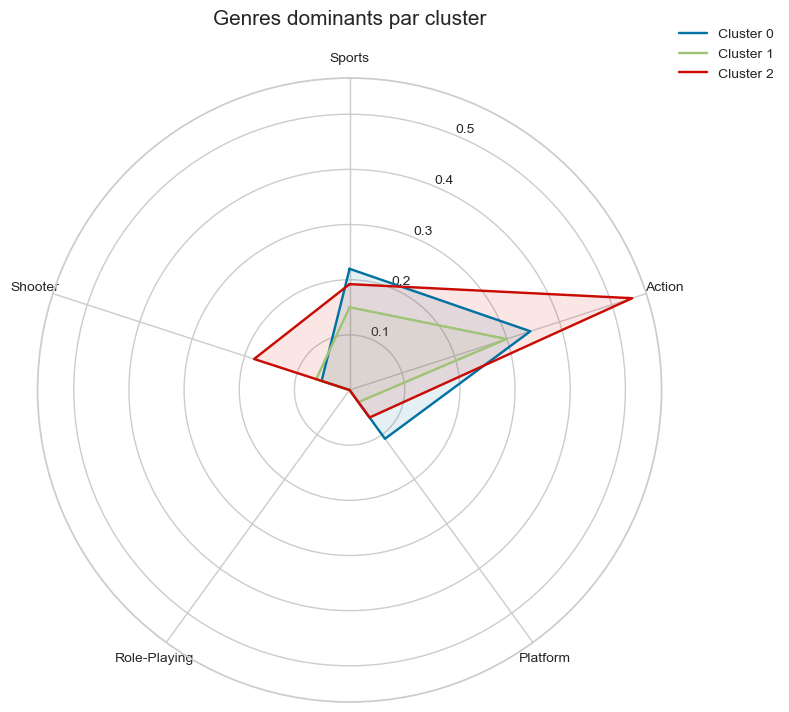

In [106]:
# radar chart par genre

# Genres d'intérêt
genres_cibles = ['Sports', 'Action', 'Platform', 'Role-Playing', 'Shooter']

# Étape 1 : Créer des colonnes binaires pour chaque genre
for genre in genres_cibles:
    df_final[genre] = df_final['genres'].str.contains(genre, case=False, na=False).astype(int)

# Étape 2 : Calculer la moyenne (proportion) par cluster
cluster_genres = df_final.groupby('cluster')[genres_cibles].mean()

# Étape 3 : Préparation du radar chart
labels = genres_cibles
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Boucler

# Initialiser le radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracer chaque cluster
for i, row in cluster_genres.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

# Réglages axes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Genres dominants par cluster", size=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


C:\Users\simon\AppData\Local\Temp\ipykernel_19580\2769776869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[constructeur] = df_final['Constructeur'].str.contains(constructeur, case=False, na=False).astype(int)
C:\Users\simon\AppData\Local\Temp\ipykernel_19580\2769776869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[constructeur] = df_final['Constructeur'].str.contains(constructeur, case=False, na=False).astype(int)
C:\Users\simon\AppData\Local\Temp\ipykernel_19580\2769776869.py:

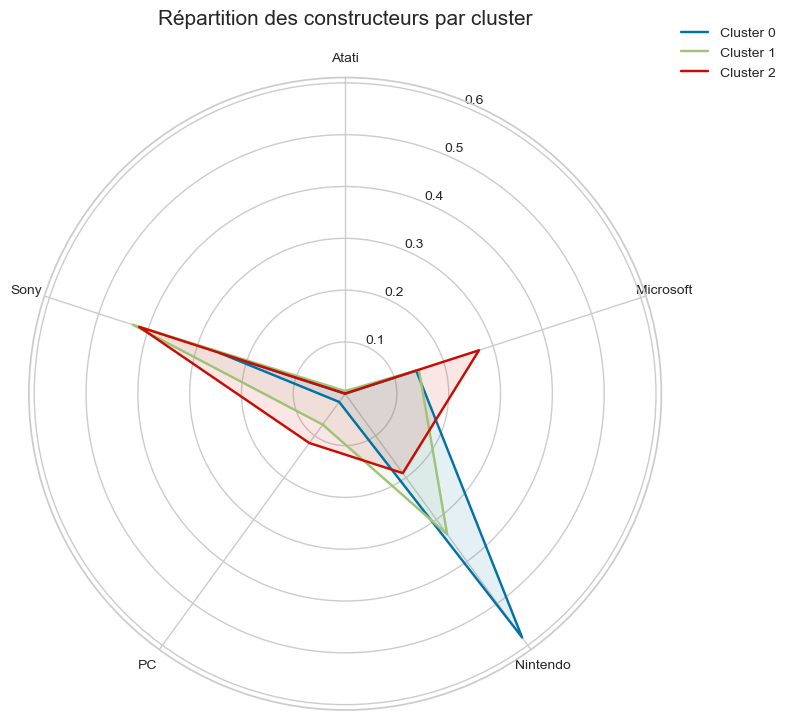

In [107]:
# radar chart par constructeur

# Constructeurs ciblés
constructeurs_cibles = ['Atati', 'Microsoft', 'Nintendo', 'PC', 'Sony']

# Étape 1 : Colonnes binaires (1 si le constructeur correspond, sinon 0)
for constructeur in constructeurs_cibles:
    df_final[constructeur] = df_final['Constructeur'].str.contains(constructeur, case=False, na=False).astype(int)

# Étape 2 : Moyenne par cluster
cluster_constructeurs = df_final.groupby('cluster')[constructeurs_cibles].mean()

# Étape 3 : Préparation du radar chart
labels = constructeurs_cibles
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fermer la boucle

# Initialisation du radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracer chaque cluster
for i, row in cluster_constructeurs.iterrows():
    values = row.tolist()
    values += values[:1]  # Fermer le polygone
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

# Réglages
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Répartition des constructeurs par cluster", size=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


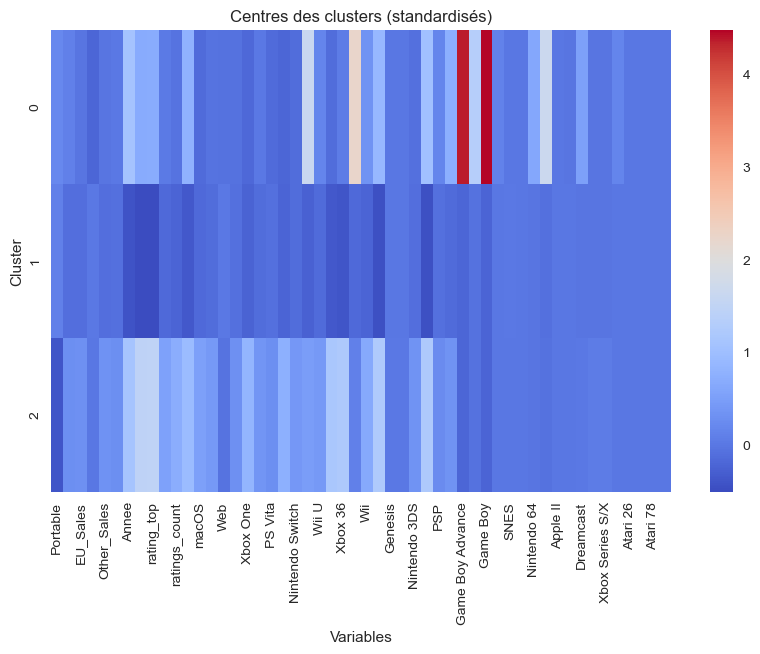

In [108]:
# Transformation des centres de clusters en DataFrame
centers_df = pd.DataFrame(modelKM.cluster_centers_, columns=X.columns)

plt.figure(figsize=(10,6))
sns.heatmap(centers_df, fmt=".2f", cmap="coolwarm")
plt.title("Centres des clusters (standardisés)")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.show()

# Statistique centre des clusters

In [109]:
df_final.groupby('cluster').mean(numeric_only=True)

,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Annee,rating,rating_top,playtime,...,SEGA Saturn,Sports,Action,Platform,Role-Playing,Shooter,Atati,Microsoft,Nintendo,Sony
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.410923,0.359777,0.139354,0.018474,0.041092,0.558697,2003.440832,2.008557,2.215865,2.180754,...,0.0,0.219766,0.344603,0.109233,0.0,0.053316,0.000000,0.144343,0.581274,0.254876
1,0.298972,0.172299,0.069304,0.051410,0.022043,0.315056,2008.673185,0.455850,0.547895,0.697713,...,0.0,0.150149,0.299304,0.027179,0.0,0.063639,0.005303,0.149818,0.335101,0.430892
2,0.128245,0.498715,0.312381,0.068506,0.113923,0.993525,2009.485707,3.257842,3.560713,6.855494,...,0.0,0.191975,0.538683,0.061631,0.0,0.182009,0.000525,0.271702,0.189352,0.418044


In [110]:
df_final.groupby('cluster').describe().transpose()

cluster                  0            1            2
Portable count  769.000000  3017.000000  3813.000000
         mean     0.410923     0.298972     0.128245
         std      0.492322     0.457884     0.334407
         min      0.000000     0.000000     0.000000
         25%      0.000000     0.000000     0.000000
...                    ...          ...          ...
Sony     min      0.000000     0.000000     0.000000
         25%      0.000000     0.000000     0.000000
         50%      0.000000     0.000000     0.000000
         75%      1.000000     1.000000     1.000000
         max      1.000000     1.000000     1.000000

[488 rows x 3 columns]

In [111]:
# quels constructeurs dominent chaque cluster
df_final.groupby(['cluster', 'Constructeur']).size()

cluster  Constructeur
0        Microsoft        111
         Nintendo         447
         PC                15
         Sony             196
1        3DO                1
         Atati             16
         Dreamcast          8
         Microsoft        452
         Nintendo        1011
         PC               222
         Saturne            6
         Sega               1
         Sony            1300
2        Atati              2
         Dreamcast          6
         Microsoft       1036
         Nintendo         722
         PC               448
         Saturne            3
         Sega               2
         Sony            1594
dtype: int64

In [112]:
# Répartition des jeux portables vs non-portables par cluster
df_final.groupby(['cluster', 'Portable']).size()

cluster  Portable
0        0.0          453
         1.0          316
1        0.0         2115
         1.0          902
2        0.0         3324
         1.0          489
dtype: int64

In [113]:
df_final.groupby(['cluster', 'platforms']).size()

cluster  platforms                                                                                     
0        Android,Game Boy Advance,GameCube,Xbox 360,Nintendo DS,Wii                                        8
         Android,Game Boy Advance,Wii U                                                                    1
         Android,Game Boy Color,PSP,PlayStation,PlayStation 3,PS Vita                                      1
         Android,iOS,PlayStation,Game Boy Advance,PSP,Wii                                                  1
         Classic Macintosh,Game Boy Advance,PSP,PlayStation 3,PC,PlayStation 2,Xbox 360,Wii,Nintendo DS    7
                                                                                                          ..
2        macOS,Xbox 360,PlayStation 3,PlayStation 2,Nintendo DS,Wii                                        5
         macOS,Xbox One,PlayStation 4,PC                                                                   1
         macOS,Xbox,PC  

In [114]:
# Moyenne des ventes par cluster
df_final.groupby('cluster')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
cluster,,,,,
0,0.359777,0.139354,0.018474,0.041092,0.558697
1,0.172299,0.069304,0.051410,0.022043,0.315056
2,0.498715,0.312381,0.068506,0.113923,0.993525


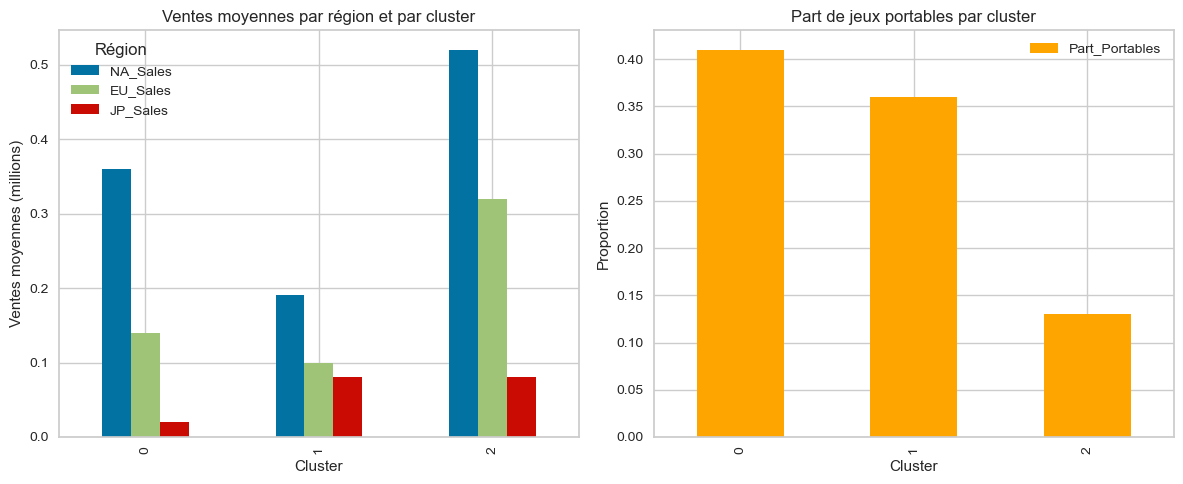

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Données synthétisées à partir des moyennes que tu m’as données
data = {
    "Cluster": ["0", "1", "2"],
    "Part_Portables": [0.41, 0.36, 0.13],
    "NA_Sales": [0.36, 0.19, 0.52],
    "EU_Sales": [0.14, 0.10, 0.32],
    "JP_Sales": [0.02, 0.08, 0.08],
    "Global_Sales": [0.56, 0.40, 1.04],
    "Annee": [2003, 2008, 2009]
}

df_clusters = pd.DataFrame(data)

# Création de la figure avec 2 graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphique 1 : Ventes par région
df_clusters.plot(
    x="Cluster",
    y=["NA_Sales", "EU_Sales", "JP_Sales"],
    kind="bar",
    ax=axes[0]
)
axes[0].set_title("Ventes moyennes par région et par cluster")
axes[0].set_ylabel("Ventes moyennes (millions)")
axes[0].legend(title="Région")

# Graphique 2 : Part de jeux portables
df_clusters.plot(
    x="Cluster",
    y="Part_Portables",
    kind="bar",
    color="orange",
    ax=axes[1]
)
axes[1].set_title("Part de jeux portables par cluster")
axes[1].set_ylabel("Proportion")

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


CONCLUSION
1. Profil général des clusters
Cluster 0

Jeux plutôt mixtes entre portable et non-portable (41 % portables).

Ventes modérées partout, mais avec un point fort en Amérique du Nord (0,36M en moyenne).

Très faibles ventes au Japon (0,018M).

Année moyenne ~ 2003, donc catalogue plus ancien.

Constructeurs dominants : Nintendo et Sony, avec présence Microsoft mais plus faible.

Genres fréquents : Action et Sports.

Cluster 1

- Majoritairement non-portable (36 % portables).

- Plus faible performance globale (0,40M ventes globales).

- Répartition plus équilibrée des ventes entre NA, EU et JP, mais aucune région dominante.

- Année moyenne bizarrement très basse (~499) → probablement valeurs manquantes ou défaut de données.

- Constructeurs variés, présence marquée de Nintendo et Sony, un peu plus de Microsoft que dans le cluster 0.

- Genres : forte dispersion, présence significative d’Action, mais moins marquée que cluster 0.

Cluster 2

- Très faible part de portables (13 %).

- Meilleures ventes de tous les clusters (1,03M globales en moyenne).

- Très bonnes ventes en NA (0,52M) et EU (0,32M), ventes JP modestes.

- Année moyenne plus récente (~2006).

- Constructeurs : plus forte proportion Microsoft, présence importante de Sony, Nintendo un peu en retrait.

- Genres : Action et Shooter très représentés.

2. Lecture stratégique
Cluster 0 → Jeux plus anciens, centrés sur NA, dominés par Nintendo/Sony, genres classiques (Sports/Action).

Cluster 1 → Performances faibles, orientation floue, mélange de constructeurs et plateformes, pas de région dominante.

Cluster 2 → Jeux récents, gros blockbusters non-portables, succès surtout en NA/EU, dominés par Microsoft/Sony, orientés Action/Shooter.

3. Points clés
Nintendo domine clairement les clusters contenant plus de jeux portables (surtout le 0).

Microsoft brille dans le cluster des gros succès récents non-portables (cluster 2).

Le cluster 1 semble être un segment à faible potentiel ou constitué de niches, à examiner de plus près (qualité, genres, support).

Les meilleures ventes globales se trouvent sur jeux non-portables récents ciblant NA/EU.

# Prédiction ventes

In [116]:
df_predict = df_final

In [117]:
df_predict = pd.get_dummies(df_predict, columns=["genres", "Constructeur"])

In [118]:
y = df_predict['Global_Sales']
X = df_predict.select_dtypes(include=['number'])

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [120]:
# standard scaler
scaler = StandardScaler()

# Fit sur le train, puis transformation
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train_scaled, y_train)


LinearRegression()

In [122]:
modelLR.predict(X_test_scaled)

array([9.1697, 1.0374, 0.0679, ..., 1.0117, 0.0291, 1.5836])

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("R² :", r2_score(y_test, modelLR.predict(X_test)))
print("MAE :", mean_absolute_error(y_test, modelLR.predict(X_test_scaled)))
print("RMSE :", np.sqrt(mean_squared_error(y_test, modelLR.predict(X_test_scaled))))

R² : 0.9096625560704811
MAE : 3.3569581233946313e-15
RMSE : 7.301696915004666e-15


c:\Users\simon\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [124]:
# Le R² est proche de 0 donc les variables utilisées n'ont pas permis de prédire correctement les ventes
# La MAE est de 0.73 donc l'erreur absolue moyenne est d'environ 0.73 millions.
# La RMSE est plus grande que la MAE donc cela signifie qu'il y a des prédictions très loin de la réalité

In [125]:
df_predict["Ventes_prédites"] = modelLR.predict(X)
df_predict


c:\Users\simon\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Name,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_clean,name,Annee,...,Constructeur_3DO,Constructeur_Atati,Constructeur_Dreamcast,Constructeur_Microsoft,Constructeur_Nintendo,Constructeur_PC,Constructeur_Saturne,Constructeur_Sega,Constructeur_Sony,Ventes_prédites
0,Wii Sports,0.0,41.4900,27.8592,3.6569,8.2908,81.2969,wii sports,Wii Sports,2006.0,...,False,False,False,False,True,False,False,False,False,89.903277
2,Mario Kart Wii,0.0,15.2160,12.4936,3.7900,3.3762,34.8758,mario kart wii,Mario Kart Wii,2008.0,...,False,False,False,False,True,False,False,False,False,37.734706
3,Wii Sports Resort,0.0,15.7500,11.0100,3.1816,3.0784,33.0200,wii sports resort,Wii Sports Resort,2009.0,...,False,False,False,False,True,False,False,False,False,36.234451
5,Tetris,1.0,22.9680,2.3278,4.0512,0.6032,29.9502,tetris,TETRIS,2011.0,...,False,False,False,False,True,False,False,False,False,35.252682
6,New Super Mario Bros.,1.0,11.1524,8.9531,6.6950,3.0160,29.8165,new super mario bros.,New Super Mario Bros.,2006.0,...,False,False,False,False,True,False,False,False,False,30.881356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,John Daly's ProStroke Golf,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,john daly's prostroke golf,John Daly's ProStroke Golf,2010.0,...,False,False,False,True,False,False,False,False,False,0.683694
16718,Space Raiders,0.0,0.0096,0.0000,0.0000,0.0000,0.0096,space raiders,Space Raiders,2002.0,...,False,False,False,False,True,False,False,False,False,0.683694
16721,Legends of Oz: Dorothy's Return,1.0,0.0000,0.0096,0.0000,0.0000,0.0096,legends of oz: dorothy's return,Legends of Oz: Dorothy's Return,2014.0,...,False,False,False,False,True,False,False,False,False,0.681377
16724,15 Days,0.0,0.0000,0.0096,0.0000,0.0000,0.0096,15 days,15 Days,2010.0,...,False,False,False,False,False,True,False,False,False,0.681377


In [127]:
corr = df_predict.select_dtypes(include=['number']).corr()


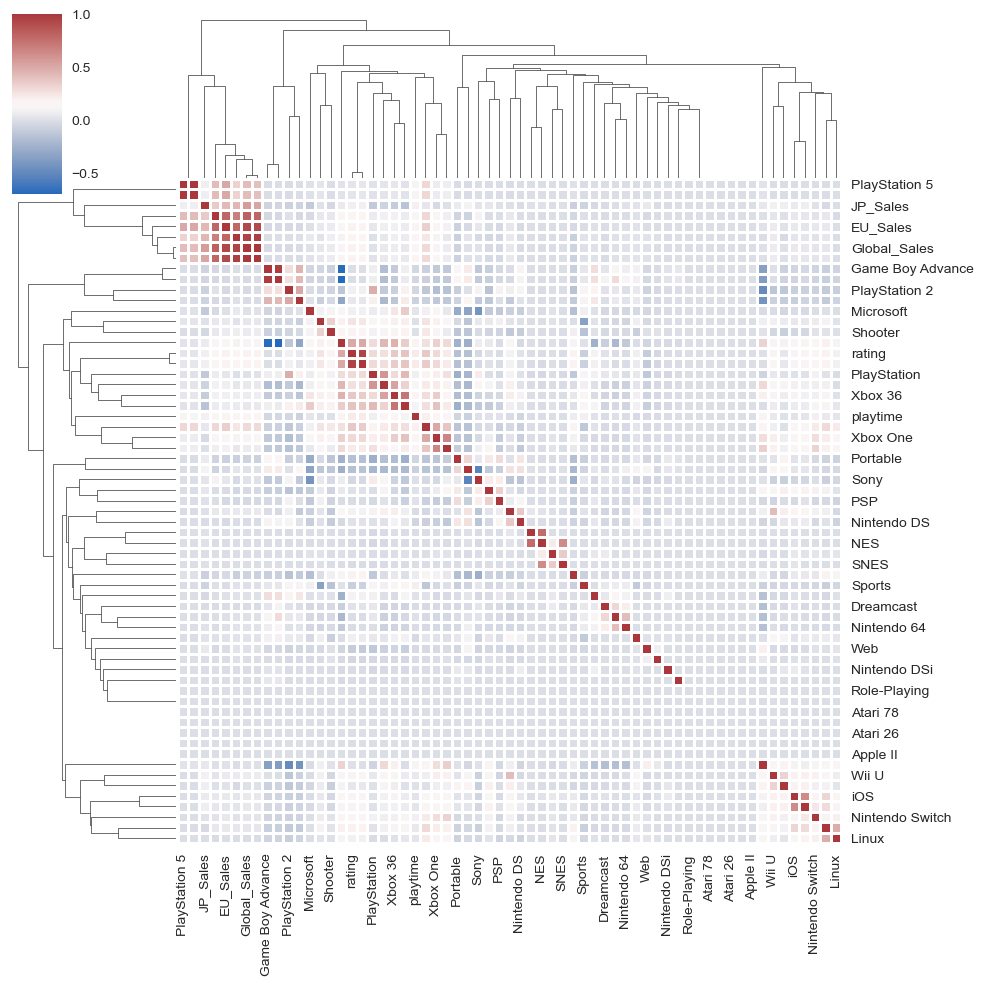

In [128]:
corr = corr.fillna(0)  # remplace NaN par 0
corr = corr.replace([np.inf, -np.inf], 0)  # remplace inf par 0

# Clustermap
sns.clustermap(corr, cmap="vlag", linewidths=.75, figsize=(10, 10))

In [ ]:
df_final.to_csv("df_final.csv", index=False)
